# Cellular Automata

## Finally, another way to simulate the predators and preys relationship could be done through cellular automata way

In [1]:
from __future__ import print_function
import random
import sys
import copy
from random import randint
import numpy

from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, clear_output
import ipywidgets as widgets
random.seed(None)
# Possible states:
EMPTY = 0
PREY = 1
PREDATOR = 2

## To store the world, let's have our code implementation use a 2-D Numpy array. We create the world and also some utility function

In [2]:
import numpy as np
import scipy as sp
import scipy.sparse

def count (G):
    """
    Counts the number of locations in a NumPy array, `G`,
    where `np.where (G)` holds.
    """
    return len (np.where (G)[0])

def find (G):
    """
    Returns the set of locations of a NumPy array, `G`,
    where `np.where (G)` holds.
    """
    assert type (G) is np.ndarray
    return {(i, j) for i, j in zip (*np.where (G))}

In [3]:
import matplotlib.pyplot as plt # Core plotting support
def create_world (n, max_predator):
    G = EMPTY * np.ones ((n, n), dtype=int)
    width, height = G.shape
    predator_count = 0
    for x in range(width):
        for y in range(height):
            i = random.randint(0, 10)
            if i <= 7:
                G[x, y] = PREY
            elif i >= 9 and predator_count < max_predator:
                G[x, y] = PREDATOR
                predator_count += 1
    return G

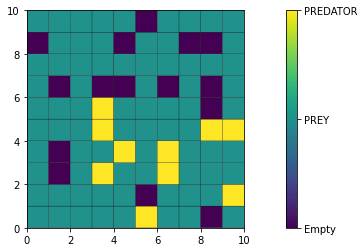

In [4]:
def show_world (G, vmin=EMPTY, vmax=PREDATOR, values="states"):
    """A helper routine to visualize a 2-D world."""
    # Set color range
    assert values in ["states", "bool"]
    if values == "states":
        vticks = range (vmin, vmax+1)
        vlabels = ['Empty', 'PREY', 'PREDATOR']
    else:
        vticks = [0, 1]
        vlabels = ['False (0)', 'True (1)']
    
    m, n = G.shape[0], G.shape[1]
    plt.pcolor (G, vmin=vmin, vmax=vmax, edgecolor='black')
    cb = plt.colorbar ()
    cb.set_ticks (vticks)
    cb.set_ticklabels (vlabels)
    plt.axis ('square')
    plt.axis ([0, m, 0, n])

# Create an empty world at time t=0
N = 10
world = create_world (N, 10)
show_world (world)

## Let's define some functions to help identify empty space, preys and predator in this world.

In [5]:
def empty (G):
    """
    Given a grid, G, returns a grid S whose (i, j) entry
    equals 1 if G[i, j] is empty or 0 otherwise.
    """
    return (G == EMPTY).astype (int)

print ("There are", count (empty (world)), "empty location initially")

There are 15 empty location initially


## **Exercise 1** (1 point). Complete the following functions, which should find prey in a given world.

In [6]:
def prey(G):
    """
    Given a grid G, returns a grid I whose (i, j) entry equals 1 if
    G[i, j] is prey or 0 otherwise.
    """
    ### BEGIN SOLUTION
    return ((G == PREY)).astype (int)
    ### END SOLUTION
    
print ("There are", count (prey (world)), "prey initially")

There are 75 prey initially


## **Exercise 2** (1 point). Complete the following functions, which should find predator in a given world.

In [7]:
def predator(G):
    """
    Given a grid G, returns a grid I whose (i, j) entry equals 2 if
    G[i, j] is predator or 0 otherwise.
    """
    ### BEGIN SOLUTION
    return ((G == PREDATOR)).astype (int)
    ### END SOLUTION
    
print ("There are", count (predator (world)), "predator initially")

There are 10 predator initially


## **Get neighbor**. Next, let's define a function that allow us to get the neigbor of the current location. We return a list of 4 location (top, left, right, bottom) and the status (prey, predator, emtpy, not valid (-1))

## **Exercise 3** (2 points). Write a function of get_neighbor

In [8]:
def get_neighbor(G, x, y): 
    height = G.shape[1]
    width = G.shape[0]
    left = [x, (y-1)%width, G[x, (y-1)%width]]
    right = [x, (y+1)%width, G[x, (y+1)%width]]
    top = [(x-1)%height, y, G[(x-1)%height, y]]
    bottom = [(x+1)%height, y, G[(x+1)%height,y]]
    if y == 0:
        left[2] = -1
    if x == 0:
        top[2] == -1
    if y == G.shape[0]:
        right[2] == -1
    if x == G.shape[1]:
        bottom[2] = -1
    return [top, left, right, bottom]

## **Movement of predator** The predator will move according to the neighbors.
* **R1**) If any of the neighbor is prey, it will randomly move to that location and eat the prey, or has offspring occupy that space according to reproductive probability
* **R2**) If the location is empty, it will move to that location randomly,it may die according to dying probability.


## **Exercise 4** (2 points). Write a function of movement of predator

There are 10 predator(s) and  75  preys now


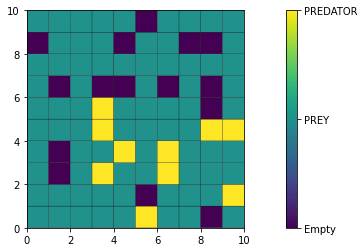

In [9]:
def predator_move (G, x, y, dying_probability, reproductive_probability):
    """
    Returns new Grid after movement
    """
    E = G
#     print(G)     
#     print(G[x, y])
#     print(x, y)
    
    if (G[x,y] != PREDATOR):
        return E
    
    ### BEGIN SOLUTION
    neighbors = get_neighbor(G, x, y)
    prey_available = []
    empty_space = []
    dying = np.random.uniform (0,1)
    reproduce = np.random.uniform (0,1)
    
    #print(neighbors)
    # Get the avaiable option
    for neighbor in neighbors:
        if neighbor[2] == EMPTY:
            empty_space.append(neighbor)
        elif neighbor[2] == PREY:
            prey_available.append(neighbor)
    
    # first eat, else move, else die
    if len(prey_available) > 0:
        get_location = randint(0, len(prey_available)-1)
        x_new = prey_available[get_location][0]
        #print('xnew', x_new)
        y_new = prey_available[get_location][1]
        #print('y_new', y_new)
        E[x, y] = EMPTY
        if dying >= dying_probability:
            E[x_new, y_new] = PREDATOR
            # create new predator
            if reproduce >= reproductive_probability:
                   E[x, y] = PREDATOR
        else:
            E[x_new, y_new] = EMPTY
            
    elif len(empty_space) > 0: 
        get_location = randint(0, len(empty_space)-1)
        #print("new location" ,get_location)
        x_new = empty_space[get_location][0]
        #print('xnew', x_new)
        y_new = empty_space[get_location][1]
        #print('ynew', y_new)
        E[x, y] = EMPTY
        E[x_new, y_new] = PREDATOR
    else:
        # predator die
        E[x, y] = EMPTY
#         print('predator die')
    
    #print(G)
    #print(E)
    return E

# Visualizes your results:
print ("There are", count (predator (world)), "predator(s) and ",count (prey (world))," preys now")
show_world(world)
world = predator_move(world, 2, 0, 0.5, 0.5)
#print ("There are", count (predator (world)), "predator(s) and ",count (prey (world))," preys now")


## **Movement of prey** The prey will move according to the neighbors.
* **R1**) If any of the neighbor is empty, it can move to that place or just replicate at that place according to the reproductive probability.

## **Exercise 5** (2 points). Write a function of movement of prey

There are 10 predator(s) and  75  preys now
There are 10 predator(s) and  75  preys now


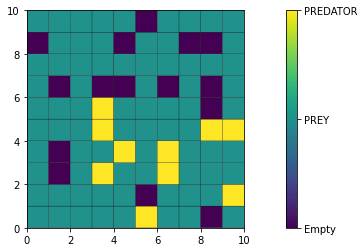

In [10]:
def prey_move (G, x, y, reproductive_probability):
    """
    Returns new Grid after movement
    """
    E = G
#     print(G)     
#     print(G[x, y])
#     print(x, y)
    
    if (G[x,y] != PREY):
        return E
    
    random_draw = np.random.uniform (0,1)
    
    ### BEGIN SOLUTION
    neighbors = get_neighbor(G, x, y)
    prey_available = []
    empty_space = []
        
    
    #print(neighbors)
    # Get the avaiable option
    for neighbor in neighbors:
        if neighbor[2] == EMPTY:
            empty_space.append(neighbor)

    # move or reproduce
    if len(empty_space) > 0: 
        get_location = randint(0, len(empty_space)-1)
        #print("new location" ,get_location)
        x_new = empty_space[get_location][0]
        #print('xnew', x_new)
        y_new = empty_space[get_location][1]
        #print('ynew', y_new)
        E[x_new, y_new] = PREY
        
        # reproduction probability, if less than this, just a movement
        if random_draw < reproductive_probability:
            E[x, y] = EMPTY
    
    #print(G)
    #print(E)
    return E

# Visualizes your results:
print ("There are", count (predator (world)), "predator(s) and ",count (prey (world))," preys now")
show_world(world)
world = prey_move(world, 0, 2, 0.5)
print ("There are", count (predator (world)), "predator(s) and ",count (prey (world))," preys now")

## Step function for each time step

In [11]:
def step (G, prey_reproduce_prob, predator_reproduce_prob, predator_dying_prob):
    """
    Simulates one time step and returns G.
    """
    height, width = G.shape
    for x in range(height):
        for y in range(width):
            if G[x, y] == PREDATOR:
                G = predator_move(G, x,y, predator_reproduce_prob, predator_dying_prob)
            elif G[x,y] == PREY:
                G = prey_move(G, x,y, prey_reproduce_prob)
    return G

In [12]:
def show_world2 (G, vmin=EMPTY, vmax=PREDATOR, values="states"):
    """A helper routine to visualize a 2-D world."""
    # Set color range
    assert values in ["states", "bool"]
#     if values == "states":
#         vticks = range (vmin, vmax+1)
#         vlabels = ['Empty', 'PREY', 'PREDATOR']
#     else:
#         vticks = [0, 1]
#         vlabels = ['False (0)', 'True (1)']
    
    m, n = G.shape[0], G.shape[1]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.pcolor (G, vmin=vmin, vmax=vmax, edgecolor='black')
    #cb = plt.colorbar ()
    #cb.set_ticks (vticks)
    #cb.set_ticklabels (vlabels)
    #plt.axis ('square')
    #plt.axis ([0, m, 0, n])


## Putting all together
Now we need to simulate for some number of steps

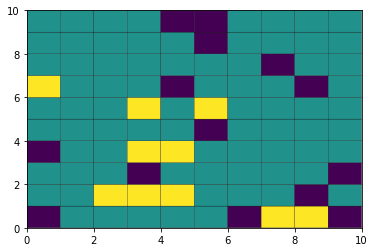

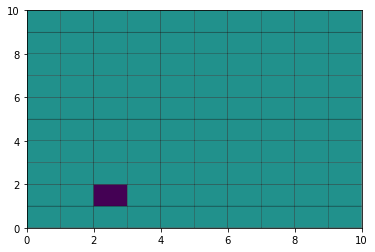

In [13]:
def summarize (G_t, verbose=True):
    #print(count(prey(G_t)))
    #print(count(predator(G_t)))
    n_prey = count(prey (G_t))
    n_predator = count(predator (G_t))
   
    
    if verbose:
        print ("# prey:", n_prey)
        print ("# predator:", n_predator)
    return n_prey, n_predator
    
def sim (G_0, max_steps, prey_reproduce_prob, predator_reproduce_prob, predator_dying_probability, verbose=False):
    """
    Starting from a given initial state, `G_0`, this
    function simulates up to `max_steps` time steps of
    the predator prey cellular automaton.
    
    It returns a tuple `(t, G_t)` containing the final
    time step `t <= max_steps` and simulation state
    `G_t`.
    """
    #print(G_0)
    time = []
    myprey = []
    mypredator = []
    t, G_t = 0, G_0.copy ()
    num_prey, num_predator = summarize (G_t, verbose=verbose)
    show_world2(G_t)
    while (num_prey> 0) and (num_predator > 0) and (t < max_steps):
        time = []
        time.append(t)
        t = t + 1
        G_t = step (G_t, prey_reproduce_prob, predator_reproduce_prob, predator_dying_probability)
        if verbose:
            show_world2(G_t)
        num_prey, num_predator = summarize (G_t, verbose=verbose)
        mypredator.append(num_predator)
        myprey.append(num_predator)
    if not verbose:
        show_world2(G_t)
    return (time, myprey, mypredator, G_t)

myworld = create_world(10, 10)
# print(myworld)
# print(count(prey(myworld)))


(t, prey_num, predator_num, G_t) = sim(myworld, 10, 0.5, 0.5, 0, verbose=False)
#print(prey_num, predator_num)

## Simple User interaction

IntText(value=10, description='world_size', style=DescriptionStyle(description_width='initial'))

IntText(value=10, description='maximum predator', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.8, description='prey_reproductive_probability', style=DescriptionStyle(description_width='in…

FloatText(value=0.8, description='predator_reproductive_probability', style=DescriptionStyle(description_width…

FloatText(value=0.6, description='predator_dying_probability', style=DescriptionStyle(description_width='initi…

IntText(value=10, description='maximum step', style=DescriptionStyle(description_width='initial'))

Checkbox(value=True, description='Verbose: show all automata step', indent=False)

Button(description='Simulate', style=ButtonStyle())

# prey: 70
# predator: 10
# prey: 75
# predator: 3
# prey: 84
# predator: 2
# prey: 92
# predator: 0


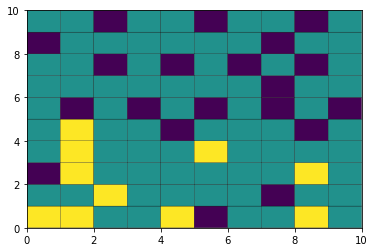

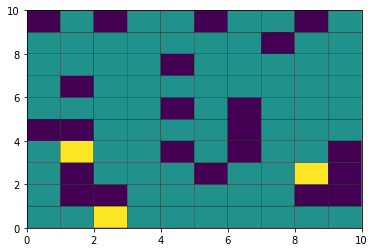

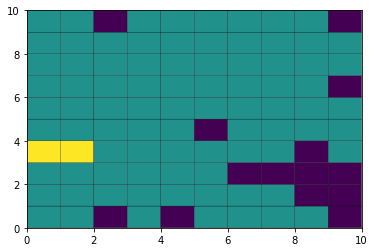

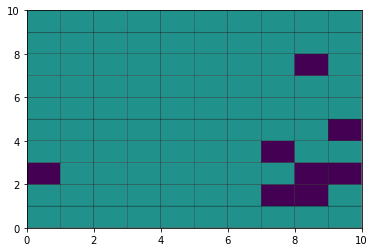

In [14]:
##### User interaction
style = {'description_width': 'initial'}
prey_reproductive_probability = widgets.FloatText(description="prey_reproductive_probability", value=0.8,style=style)
predator_reproductive_probability = widgets.FloatText(description="predator_reproductive_probability", value=0.8,style=style)
predator_dying_probability = widgets.FloatText(description="predator_dying_probability", value=0.6,style=style)
world_size = widgets.IntText(description="world_size", value=10,style=style)
max_step = widgets.IntText(description="maximum step", value=10,style=style)
max_predator = widgets.IntText(description="maximum predator", value=10,style=style)
verbose = widgets.Checkbox(
    value=False,
    description='Verbose: show all automata step',
    disabled=False,
    indent=False
)



show_only_graph = widgets.IntText(description="world_size", value=1,style=style)
button_automata = widgets.Button(description="Simulate")
display(world_size, max_predator,prey_reproductive_probability, predator_reproductive_probability, predator_dying_probability, max_step, verbose, button_automata)


def simulate(b):
    clear_output()
    display(world_size, max_predator,prey_reproductive_probability, predator_reproductive_probability, predator_dying_probability, max_step, verbose, button_automata)

    prey_reproduce_rate = prey_reproductive_probability.value
    predator_reproduce_rate = predator_reproductive_probability.value
    dying_rate = predator_dying_probability.value
    max_steps = max_step.value
    verbosity = verbose.value  
    myworld = create_world (world_size.value, max_predator.value)
    #print(myworld)
    (t, prey_num, predator_num, G_t) = sim(myworld, max_steps, prey_reproduce_rate, predator_reproduce_rate, dying_rate, verbose=verbosity)
    #print(t, prey_num, predator_num)
    
button_automata.on_click(simulate)